<a href="https://colab.research.google.com/github/SarahSouzaPontes/combinacaoModelos/blob/main/Combina%C3%A7%C3%A3o_de_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importacao via github
import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)

dados.head(5)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:

#mise un place
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados ['charges']/1000
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

#separacao de var preditoras e resposta
X = dados[['bmi', 'charges']]
y = dados['smoker']


In [ ]:
#upgrade na tecnica de validacao: K-FOLD REPETIDO

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

validacao = RepeatedKFold(n_splits = 10, n_repeats = 3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#regresao logistica
modelo = LogisticRegression()
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 4)

0.9332

In [ ]:
medidas

{'fit_time': array([0.01082611, 0.01041341, 0.0115447 , 0.01143217, 0.01179004,
        0.01152992, 0.01131678, 0.01088166, 0.01222897, 0.01044464,
        0.0107286 , 0.01139235, 0.011549  , 0.01049709, 0.01146603,
        0.01538754, 0.01112199, 0.01071763, 0.01088476, 0.0104897 ,
        0.01102352, 0.01028013, 0.01022005, 0.01024222, 0.01030207,
        0.01037431, 0.01056147, 0.0112772 , 0.01096845, 0.01062727]),
 'score_time': array([0.00200796, 0.00162268, 0.00179172, 0.0016408 , 0.00175667,
        0.00175524, 0.0017364 , 0.0017097 , 0.00178051, 0.00164604,
        0.00178981, 0.00171018, 0.00175786, 0.00170302, 0.00172949,
        0.00260568, 0.00167847, 0.00164366, 0.00165868, 0.00172281,
        0.00170112, 0.00163722, 0.00160289, 0.00181699, 0.00165558,
        0.00172496, 0.00169373, 0.0016408 , 0.00166368, 0.00164843]),
 'test_score': array([0.91791045, 0.97014925, 0.91791045, 0.93283582, 0.94776119,
        0.93283582, 0.88059701, 0.95522388, 0.93984962, 0.92481203,
    

In [ ]:
#KNN
modelo = KNeighborsClassifier(n_neighbors=25)
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(),4)

0.9614

In [ ]:
#ARVORE DE DECISAO
modelo = DecisionTreeClassifier(max_depth=3)
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(),4)

0.9616

In [ ]:
#modelos de classificacao com 'probabilidade'
#interpretar como propensão a classificacao

modelo = LogisticRegression()
modelo.fit(X,y)
modelo.predict(X)
modelo.predict_proba(X).round(4).tolist()
#probabilidade do 0 e a ser 1

[[0.8241, 0.1759],
 [0.9997, 0.0003],
 [0.999, 0.001],
 [0.175, 0.825],
 [0.9975, 0.0025],
 [0.9941, 0.0059],
 [0.9972, 0.0028],
 [0.9897, 0.0103],
 [0.9956, 0.0044],
 [0.0533, 0.9467],
 [0.9963, 0.0037],
 [0.0836, 0.9164],
 [0.9997, 0.0003],
 [0.9988, 0.0012],
 [0.1568, 0.8432],
 [0.9956, 0.0044],
 [0.9866, 0.0134],
 [0.9934, 0.0066],
 [0.9991, 0.0009],
 [0.0614, 0.9386],
 [0.9933, 0.0067],
 [0.999, 0.001],
 [0.9998, 0.0002],
 [0.0187, 0.9813],
 [0.9932, 0.0068],
 [0.9178, 0.0822],
 [0.723, 0.277],
 [0.9878, 0.0122],
 [0.9557, 0.0443],
 [0.0455, 0.9545],
 [0.0959, 0.9041],
 [0.9969, 0.0031],
 [0.9964, 0.0036],
 [0.9342, 0.0658],
 [0.0009, 0.9991],
 [0.9866, 0.0134],
 [0.9671, 0.0329],
 [0.9851, 0.0149],
 [0.0364, 0.9636],
 [0.0064, 0.9936],
 [0.9963, 0.0037],
 [0.9996, 0.0004],
 [0.9608, 0.0392],
 [0.9968, 0.0032],
 [0.9995, 0.0005],
 [0.9529, 0.0471],
 [0.9999, 0.0001],
 [0.9996, 0.0004],
 [0.8753, 0.1247],
 [0.0338, 0.9662],
 [0.9998, 0.0002],
 [0.9994, 0.0006],
 [0.3638, 0.6362],
 

In [ ]:
#combinacao de modelos hard
from sklearn.ensemble import VotingClassifier

reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=25)
arvore = DecisionTreeClassifier(max_depth=3)

modelos = [('Reg. LOg.', reglog),
           ('ḰNN', knn),
           ('Árvore', arvore)]

modelo = VotingClassifier(modelos, voting = 'hard')
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(),4)

0.9634

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names

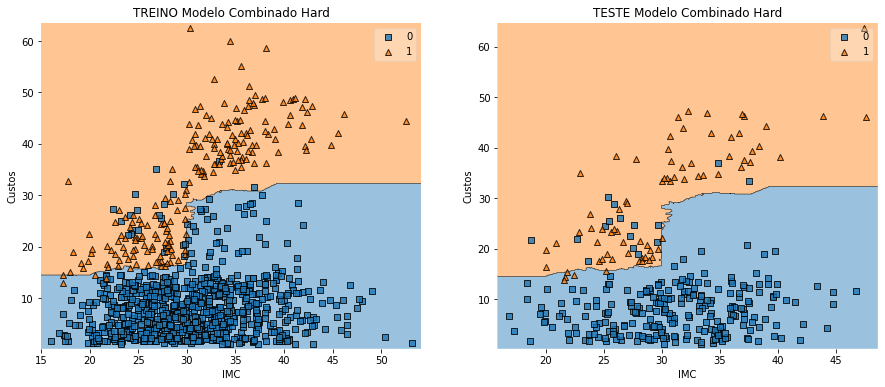

In [ ]:
#Regiao de Decisao

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Modelo Combinado Hard')




plt.subplot(1,2,2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Modelo Combinado Hard')

plt.show()

In [ ]:
#combinacao por votos 'SOFT'

from sklearn.ensemble import VotingClassifier

reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25)
arvore = DecisionTreeClassifier(max_depth = 3)

modelos = [('Reg. Log.', reglog),('KNN', knn), ('Árvore', arvore)]

modelo = VotingClassifier(modelos, voting = 'soft')

medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')

round(medidas['test_score'].mean(), 4)

0.9659

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names

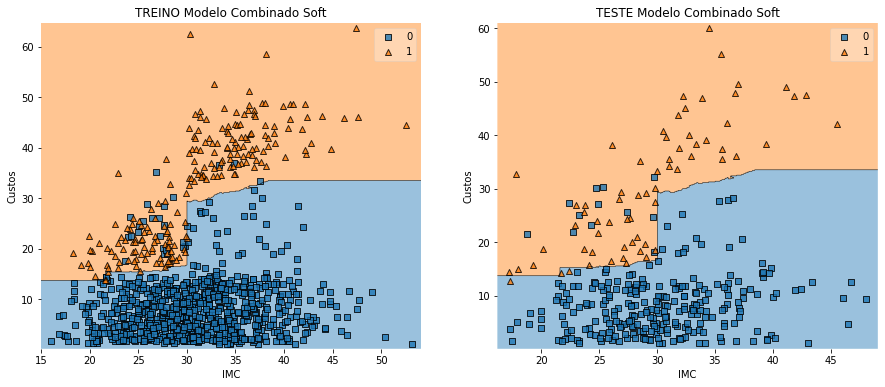

In [ ]:
#Regiao de Decisao


Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Modelo Combinado Soft')




plt.subplot(1,2,2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Modelo Combinado Soft')

plt.show()